In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cartopy as cart
import cartopy.crs as ccrs

In [7]:
with open('/scratch/DaanR/meshes/icosahedron_mesh_refin_6.pickle', 'rb') as pickFile:
    icosahedron_6 = pickle.load(pickFile)

In [8]:
icosahedron_6

{'areas': array([4.94074668e-05, 4.94074668e-05, 4.94074668e-05, ...,
        4.96991420e-05, 4.95024946e-05, 4.94819902e-05]),
 'lats': array([ 1.57079633,  0.46364761, -0.46364761, ..., -0.3539664 ,
        -0.35812193, -0.34434926]),
 'points': array([[ 6.12323400e-17,  0.00000000e+00,  1.00000000e+00],
        [ 8.94427191e-01,  0.00000000e+00,  4.47213595e-01],
        [ 7.23606798e-01,  5.25731112e-01, -4.47213595e-01],
        ...,
        [ 4.67164539e-01, -8.13394835e-01, -3.46621026e-01],
        [ 4.36035130e-01, -8.28861839e-01, -3.50515931e-01],
        [ 5.27491588e-01, -7.79608572e-01, -3.37584212e-01]]),
 'simplices': array([[     0, 108911, 110988],
        [     0, 110988, 111815],
        [     0, 111815, 106134],
        ...,
        [122575, 122768, 122775],
        [122578, 122586, 122583],
        [122606, 122792, 122790]]),
 'edge_lenghts': (array([0.0101931 , 0.0101931 , 0.0101931 , ..., 0.011981  , 0.01020318,
         0.01020316]),
  array([0.01198257, 0.0119

In [91]:
lons = np.degrees(isocahedron_6['lons'])
lats = np.degrees(isocahedron_6['lats'])

lats_m = np.degrees(isocahedron_6['lats']) > 60

In [92]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [96]:
simplices = isocahedron_6['simplices']

In [97]:
lons[simplices[100][0]], lats[simplices[100][0]], lons[simplices[100][1]], lats[simplices[100][1]]

(-5.4330360144052576e-15,
 -10.812316963571707,
 0.575367080903666,
 -10.48514628976017)

In [98]:
haversine(lons[simplices[100][0]], lats[simplices[100][0]], lons[simplices[100][1]], lats[simplices[100][1]])

72.6421077784688

In [76]:
lons[isocahedron_5['simplices'][0][0]]
lons[isocahedron_5['simplices'][0][1]]

35.99999999999993

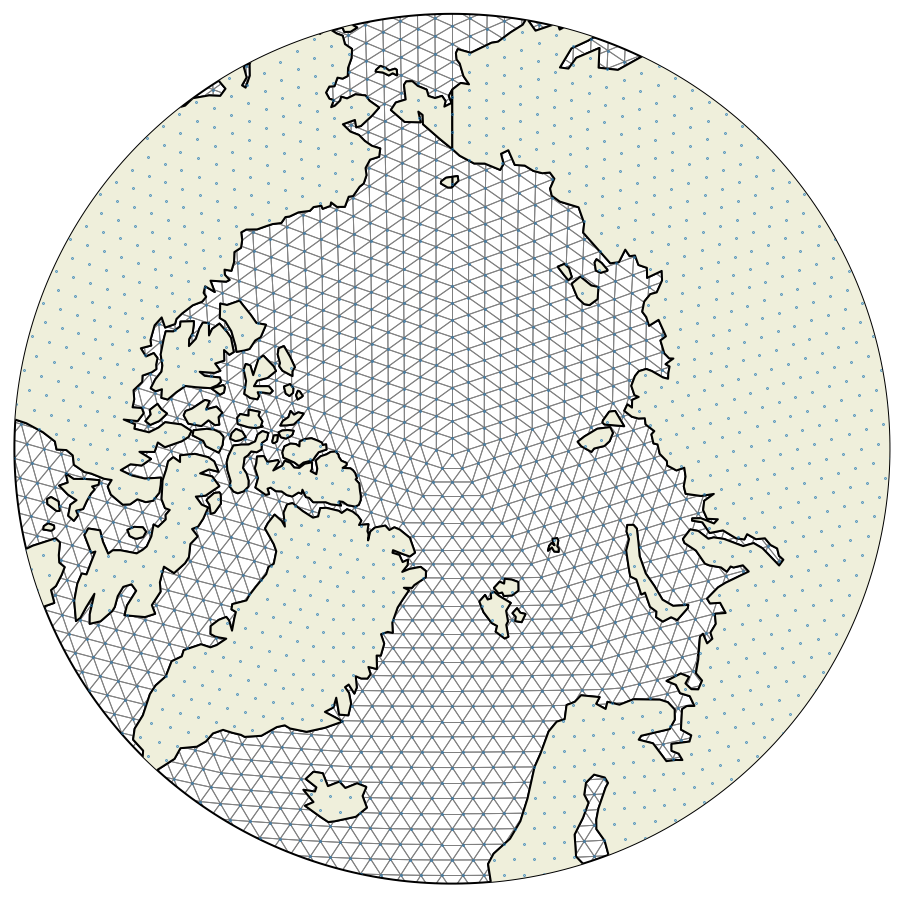

In [69]:
from matplotlib import path as mpath
def set_circular_boundary(ax):
    theta = np.linspace(0, 2*np.pi, 400)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
    return circle
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0.0, globe=None))
ax.set_extent((-180,180,60,90), crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cart.feature.LAND, zorder=5, edgecolor='k')
#gl = ax.gridlines()
circle_clip = set_circular_boundary(ax)
ax.scatter(lons[lats_m], lats[lats_m], s=0.1, zorder=10, transform=ccrs.Geodetic())
for triangle in isocahedron_5['simplices']:
    ax.plot([lons[triangle[0]], lons[triangle[1]]], 
            [lats[triangle[0]], lats[triangle[1]]],
            transform=ccrs.Geodetic(), linewidth=0.5, color='grey')
    ax.plot([lons[triangle[1]], lons[triangle[2]]], 
            [lats[triangle[1]], lats[triangle[2]]],
            transform=ccrs.Geodetic(), linewidth=0.5, color='grey')
    ax.plot([lons[triangle[2]], lons[triangle[0]]], 
            [lats[triangle[2]], lats[triangle[0]]],
            transform=ccrs.Geodetic(), linewidth=0.5, color='grey')
plt.savefig('isocahedron_grid_5.png', dpi=300)